In [11]:
%matplotlib inline
import math
import time
import numpy as np
import torch
import d2l.torch as d2l
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  #matplotlib中文支持

In [12]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [13]:
#定义计时器
class Timer:
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()
    
    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时，并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    
    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)
    
    def sum(self):
        """返回时间总和"""
        return sum(self.times)
    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [14]:
#使用for循环每次执行一位
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i]+b[i]
f'{timer.stop():.5f}sec'

'0.04079sec'

In [15]:
#使用重载的+运算符来计算按元素的和
timer.start()
d = a+b
f'{timer.stop():.5f}sec'

'0.00045sec'

### 正态分布

In [16]:
def normal(x,mu,sigma):
    p = 1/math.sqrt(2*math.pi*sigma**2)
    return p*np.exp(-0.5 / sigma**2*(x-mu)**2)

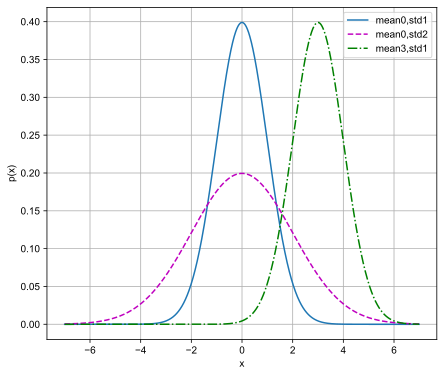

In [18]:
#可视化正态分布
x = np.arange(-7,7,0.01)

#均值和标准差对
params = [(0,1),(0,2),(3,1)]
d2l.plot(x,[normal(x,mu,sigma) for mu,sigma in params],xlabel = 'x',ylabel = 'p(x)',
         figsize = (7,6),legend = [f'mean{mu},std{sigma}' for mu,sigma in params])